In [487]:
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import re
import requests

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
plt.style.use('ggplot')

# Annual ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm`

In [488]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm")
doc = BeautifulSoup(response.text)

In [489]:
stations = []
lines = ""
for row in doc.find_all("tr")[4:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [490]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

In [491]:
## Changing the numbers to actual numbers

cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [492]:
def get_change(x):
    return x['2018'] - x['2017']

df['17-18 change'] = df.apply(get_change, axis=1)

In [493]:
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018,17-18 change
0,138 St-Grand Concourse,54,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598,-92148.0
1,149 St-Grand Concourse,542,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763,-282252.0
2,161 St-Yankee Stadium,4DB,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290,-204216.0
3,167 St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140,-21088.0
4,167 St,DB,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919,-1270532.0


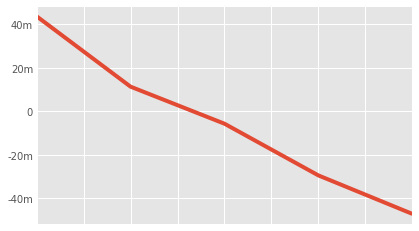

In [494]:
# / df.groupby('Borough').lines.count().values

average={}
average['index'] = [0]
average['13-14'] = (df['2014'].sum() - df['2013'].sum())
average['14-15'] = (df['2015'].sum() - df['2014'].sum()) 
average['15-16'] = (df['2016'].sum() - df['2015'].sum())
average['16-17'] = (df['2017'].sum() - df['2016'].sum())
average['17-18'] = (df['2018'].sum() - df['2017'].sum())
average = pd.DataFrame(average)
average = average.transpose()
ax=average.tail(5).plot(legend=False)
ax.set_yticklabels(['','-40m','-20m','0','20m','40m'])
ax.set_xticklabels('')

plt.savefig("images/header_image.svg")

In [495]:
average

,0
index,0.0
13-14,43682362.0
14-15,11305259.0
15-16,-5732200.0
16-17,-29515242.0
17-18,-47206627.0


In [496]:
df2={}
df2['borough'] = ['Brooklyn','Manhattan','Queens','The Bronx']
df2['13-14'] = df.groupby('Borough')['2014'].sum().values - df.groupby('Borough')['2013'].sum().values
df2['14-15'] = df.groupby('Borough')['2015'].sum().values - df.groupby('Borough')['2014'].sum().values
df2['15-16'] = df.groupby('Borough')['2016'].sum().values - df.groupby('Borough')['2015'].sum().values
df2['16-17'] = df.groupby('Borough')['2017'].sum().values - df.groupby('Borough')['2016'].sum().values
df2['17-18'] = df.groupby('Borough')['2018'].sum().values - df.groupby('Borough')['2017'].sum().values
df2 = pd.DataFrame(df2)
df2.head()

,borough,13-14,14-15,15-16,16-17,17-18
0,Brooklyn,10332661.0,4823755.0,-3008378.0,-5167670.0,-9141248.0
1,Manhattan,24960142.0,5029404.0,-3937801.0,-10821930.0,-19055757.0
2,Queens,4990699.0,1644794.0,452828.0,-9667468.0,-9027716.0
3,The Bronx,3398860.0,-192694.0,761151.0,-3858174.0,-9981906.0


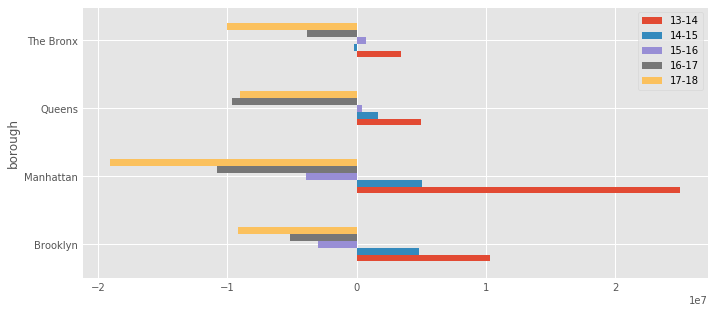

In [497]:
df2.plot(kind='barh', x='borough', y=['13-14','14-15','15-16','16-17','17-18'], figsize=(10,5))

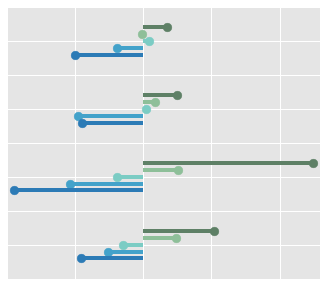

In [498]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim([-1,7])
ax.set_xlim([-20000000, 26000000])
ax.xaxis.tick_top()
ax.set_yticklabels([''])
ax.set_xticklabels([''])
# ax.set_title('Change in annual subway ridership from year to year')

ax.hlines(xmin=0, xmax=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], color='#5E8066')
legend = [ax.scatter(x=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], s=75, color='#5E8066')]

ax.hlines(xmin=0, xmax=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], color='#8EBF99')
legend = [ax.scatter(x=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], s=75, color='#8EBF99')]

ax.hlines(xmin=0, xmax=df2['15-16'], y=[(0), (2), (4), (6)], color='#7bccc4')
legend = [ax.scatter(x=df2['15-16'], y=[(0), (2), (4), (6)], s=75, color='#7bccc4')]

ax.hlines(xmin=df2['16-17'], xmax=0, y=[(0-.2), (2-.2), (4-.2), (6-.2)], color='#43a2ca')
legend = [ax.scatter(x=df2['16-17'], y=[(0-.2), (2-.2), (4-.2), (6-.2)], s=75, color='#43a2ca')]

ax.hlines(xmin=df2['17-18'], xmax=0, y=[(0-.4), (2-.4), (4-.4), (6-.4)], color='#2c7bb6')
legend = [ax.scatter(x=df2['17-18'], y=[(0-.4), (2-.4), (4-.4), (6-.4)], s=75, color='#2c7bb6')]

three_four = mpatches.Patch(color='#5E8066', label='2013-14')
four_five = mpatches.Patch(color='#8EBF99', label='2014-15')
five_six = mpatches.Patch(color='#7bccc4', label='2015-16')
six_seven = mpatches.Patch(color='#43a2ca', label='2016-17')
seven_eight = mpatches.Patch(color='#2c7bb6', label="2017-18")

# ax.legend(handles=[three_four, four_five,five_six,six_seven,seven_eight], bbox_to_anchor=(.85, .95))

plt.savefig("images/lead_image.svg", bbox_inches='tight', transparent=True)

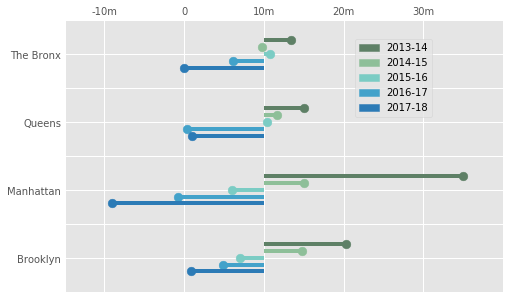

In [499]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_ylim([-1,7])
ax.set_xlim([-25000000, 30000000])
ax.xaxis.tick_top()
ax.set_yticklabels(['','Brooklyn','','Manhattan','','Queens','','The Bronx',''])
ax.set_xticklabels(['-20m','-10m','0','10m','20m','30m'])
# ax.set_title('Change in annual subway ridership from year to year')

ax.hlines(xmin=0, xmax=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], color='#5E8066')
legend = [ax.scatter(x=df2['13-14'], y=[(0+.4), (2+.4), (4+.4), (6+.4)], s=75, color='#5E8066')]

ax.hlines(xmin=0, xmax=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], color='#8EBF99')
legend = [ax.scatter(x=df2['14-15'], y=[(0+.2), (2+.2), (4+.2), (6+.2)], s=75, color='#8EBF99')]

ax.hlines(xmin=0, xmax=df2['15-16'], y=[(0), (2), (4), (6)], color='#7bccc4')
legend = [ax.scatter(x=df2['15-16'], y=[(0), (2), (4), (6)], s=75, color='#7bccc4')]

ax.hlines(xmin=df2['16-17'], xmax=0, y=[(0-.2), (2-.2), (4-.2), (6-.2)], color='#43a2ca')
legend = [ax.scatter(x=df2['16-17'], y=[(0-.2), (2-.2), (4-.2), (6-.2)], s=75, color='#43a2ca')]

ax.hlines(xmin=df2['17-18'], xmax=0, y=[(0-.4), (2-.4), (4-.4), (6-.4)], color='#2c7bb6')
legend = [ax.scatter(x=df2['17-18'], y=[(0-.4), (2-.4), (4-.4), (6-.4)], s=75, color='#2c7bb6')]

three_four = mpatches.Patch(color='#5E8066', label='2013-14')
four_five = mpatches.Patch(color='#8EBF99', label='2014-15')
five_six = mpatches.Patch(color='#7bccc4', label='2015-16')
six_seven = mpatches.Patch(color='#43a2ca', label='2016-17')
seven_eight = mpatches.Patch(color='#2c7bb6', label="2017-18")

ax.legend(handles=[three_four, four_five,five_six,six_seven,seven_eight], bbox_to_anchor=(.85, .95))

plt.savefig("images/annual_ridership_by_borough.svg", bbox_inches='tight', transparent=True)

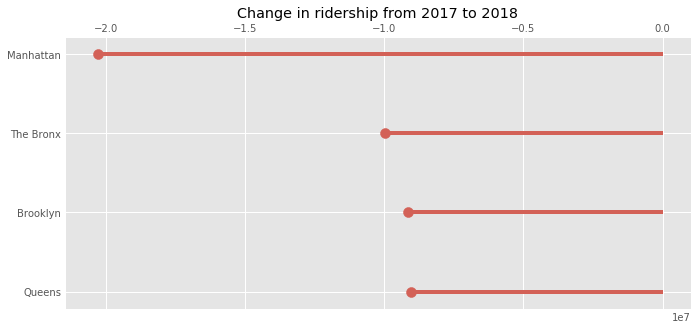

In [500]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hlines(xmin=[0], xmax=df.groupby('Borough')['17-18 change'].sum().sort_values().iloc[::-1], y=df.groupby('Borough')['2018'].sum().index, color='#d36157')
ax.xaxis.tick_top()
ax.set_yticklabels(['Queens','Brooklyn','The Bronx','Manhattan'])
ax.set_title('Change in ridership from 2017 to 2018')
legend = [ax.scatter(x=df.groupby('Borough')['17-18 change'].sum().sort_values().iloc[::-1], y=df.groupby('Borough')['17-18 change'].sum().index, s=100, color='#d36157')]

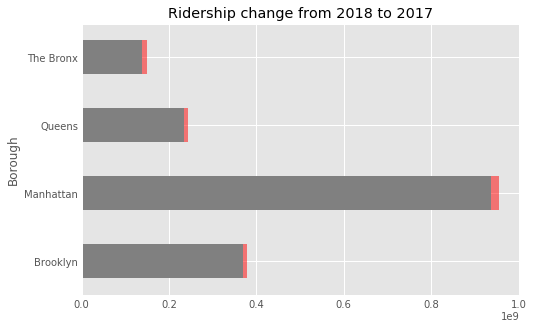

In [501]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

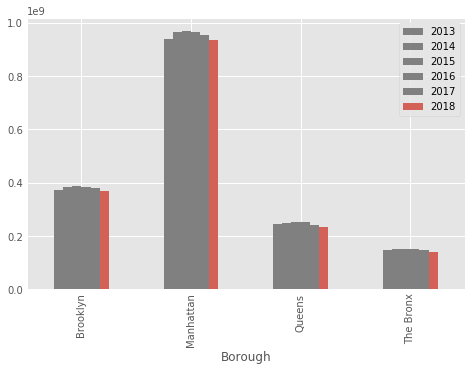

In [502]:
df.groupby('Borough').sum().plot(kind='bar', y=['2013','2014','2015','2016','2017','2018'], color=['gray','gray','gray','gray','gray','#D36157'], figsize=(7, 5))

In [503]:
df.to_csv("station_annual_ridership.csv", index=False)

## Average weekday ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub.htm`

In [504]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub.htm")
doc = BeautifulSoup(response.text)

In [505]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [506]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [507]:
df.tail()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
417,Sutphin Blvd-Archer Av-JFK Airport,ZJE,Queens,54,23012.0,23747.0,24349.0,24796.0,23843,23388
418,Vernon Blvd-Jackson Av,7,Queens,96,12610.0,14123.0,14819.0,15910.0,15781,15093
419,Woodhaven Blvd,ZJ,Queens,294,4576.0,4796.0,4940.0,4838.0,5104,4771
420,Woodhaven Blvd,RM,Queens,66,22276.0,22156.0,22220.0,22483.0,21879,20704
421,Woodside-61 St,7,Queens,83,16559.0,16807.0,17007.0,17236.0,16945,16501


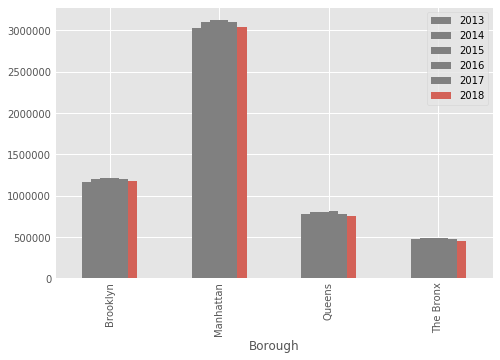

In [508]:
df.groupby('Borough').sum().plot(kind='bar', y=['2013','2014','2015','2016','2017','2018'], color=['gray','gray','gray','gray','gray','#D36157'], figsize=(7, 5))

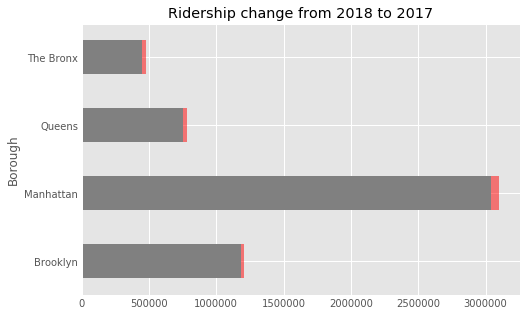

In [509]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

In [510]:
df['change'] = df['2018'] - df['2017']

In [511]:
brooklyn = df[df.Borough == 'Brooklyn']

In [20]:
f = df[(df.lines.str.contains("F")) & (df.Borough == "Brooklyn")]

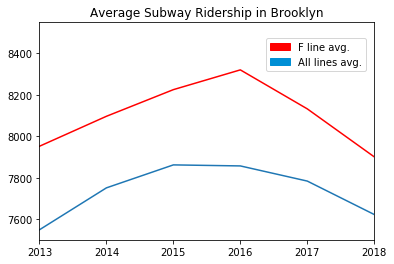

In [21]:
ax = f[cols].mean().plot(title="Average Subway Ridership in Brooklyn", color='red')
brooklyn[cols].mean().plot()

green_color = mpatches.Patch(color='#FF0000', label='F line avg.')
gold_color = mpatches.Patch(color='#008FD5', label='All lines avg.')
ax.set_ylim(7500,8550)


ax.legend(handles=[green_color, gold_color], bbox_to_anchor=(.99, .95))
plt.savefig("C:/Users/sawye/Desktop/reporting/story1/media/ridership.png", bbox_inches='tight')

In [22]:
df.to_csv("station_weekday_ridership.csv", index=False)

## Average Weekend Ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm`

In [23]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm")
doc = BeautifulSoup(response.text)

In [24]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [25]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [26]:
df.tail()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
417,Sutphin Blvd-Archer Av-JFK Airport,ZJE,Queens,52,26184.0,28862.0,28383.0,28587.0,25234,24020
418,Vernon Blvd-Jackson Av,7,Queens,135,9491.0,10347.0,12582.0,14981.0,14901,11858
419,Woodhaven Blvd,ZJ,Queens,354,4255.0,5226.0,5388.0,5099.0,3884,2820
420,Woodhaven Blvd,RM,Queens,54,27194.0,27105.0,26745.0,25550.0,23929,22672
421,Woodside-61 St,7,Queens,73,20432.0,19669.0,20127.0,20360.0,21067,19796


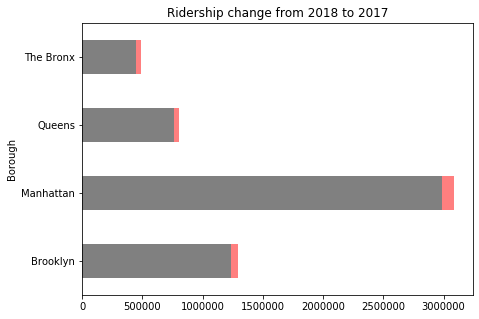

In [27]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

In [20]:
df.to_csv("station_weekend_ridership.csv", index=False)